# Anomaly Detection Examples with R carData Davis dataset with Gamma Distribution

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P62-64 の例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import gamma

%matplotlib inline

In [2]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
n = len(df)

### 標本平均と標本標準偏差の計算

In [4]:
mu = df.mean(axis=0)['weight']
si = df.std(axis=0)['weight']

In [5]:
print('標本平均:', mu)
print('標本標準偏差:', si)

標本平均: 65.8
標本標準偏差: 15.095008992458794


### ガンマ分布への当てはめ

In [6]:
fitted_alpha, fitted_loc, fitted_beta = gamma.fit(df['weight'], floc=0)

In [7]:
print(fitted_alpha, fitted_loc, fitted_beta)

22.48530359200564 0 2.926355863097812


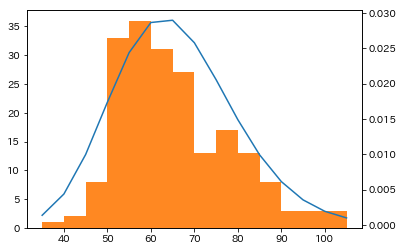

In [8]:
steps = np.linspace(35, 105, 15)

fig, ax1 = plt.subplots()
ax1.hist(df['weight'], steps, color='#ff8822')
ax2 = ax1.twinx()
ax2.plot(steps, gamma.pdf(steps, fitted_alpha, loc=fitted_loc, scale=fitted_beta))
plt.show()

### 異常度の計算

In [9]:
a = df['weight'] / fitted_beta - (fitted_alpha -1) * \
            np.log(df['weight'] / fitted_beta)

閾値を99%分位点に設定

In [10]:
th = np.percentile(a, q=99)

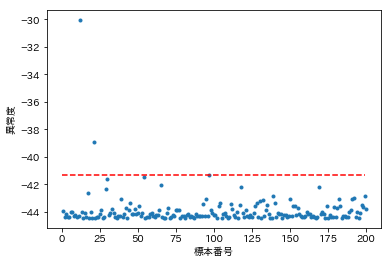

In [11]:
plt.plot(a,'.')
plt.plot(np.repeat(th, len(a)), 'r--')
plt.xlabel('標本番号')
plt.ylabel('異常度')
plt.show()